In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
cancer.data.shape

(569, 30)

In [7]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [8]:
df_cancer.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
401,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,0.05541,...,20.14,87.64,589.5,0.1374,0.15750,0.15140,0.06876,0.2460,0.07262,1.0
501,13.82,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,...,32.94,106.00,788.0,0.1794,0.39660,0.33810,0.15210,0.3651,0.11830,0.0
111,12.63,20.76,82.15,480.4,0.09933,0.12090,0.10650,0.06021,0.1735,0.07070,...,25.47,89.00,527.4,0.1287,0.22500,0.22160,0.11050,0.2226,0.08486,1.0
142,11.43,17.31,73.66,398.0,0.10920,0.09486,0.02031,0.01861,0.1645,0.06562,...,26.76,82.66,503.0,0.1413,0.17920,0.07708,0.06402,0.2584,0.08096,1.0
11,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,27.28,136.50,1299.0,0.1396,0.56090,0.39650,0.18100,0.3792,0.10480,0.0
299,10.51,23.09,66.85,334.2,0.10150,0.06797,0.02495,0.01875,0.1695,0.06556,...,24.22,70.10,362.7,0.1143,0.08614,0.04158,0.03125,0.2227,0.06777,1.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,0.0
328,16.27,20.71,106.90,813.7,0.11690,0.13190,0.14780,0.08488,0.1948,0.06277,...,30.38,129.80,1121.0,0.1590,0.29470,0.35970,0.15830,0.3103,0.08200,0.0
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,28.07,120.40,1021.0,0.1243,0.17930,0.28030,0.10990,0.1603,0.06818,0.0
271,11.29,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.06270,...,16.18,78.27,457.5,0.1358,0.15070,0.12750,0.08750,0.2733,0.08022,1.0


## Model Training

In [9]:
X = df_cancer.drop(['target'], axis = 1)
X.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
231,11.320,27.08,71.76,395.7,0.06883,0.03813,0.016330,0.003125,0.1869,0.05628,...,12.08,33.75,79.82,452.3,0.09203,0.14320,0.108900,0.02083,0.2849,0.07087
327,12.030,17.93,76.09,446.0,0.07683,0.03892,0.001546,0.005592,0.1382,0.06070,...,13.07,22.25,82.74,523.4,0.10130,0.07390,0.007732,0.02796,0.2171,0.07037
275,11.890,17.36,76.20,435.6,0.12250,0.07210,0.059290,0.074040,0.2015,0.05875,...,12.40,18.99,79.46,472.4,0.13590,0.08368,0.071530,0.08946,0.2220,0.06033
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.15560,0.3196,0.11510
364,13.400,16.95,85.48,552.4,0.07937,0.05696,0.021810,0.014730,0.1650,0.05701,...,14.73,21.70,93.76,663.5,0.12130,0.16760,0.136400,0.06987,0.2741,0.07582
133,15.710,13.93,102.00,761.7,0.09462,0.09462,0.071350,0.059330,0.1816,0.05723,...,17.50,19.25,114.30,922.8,0.12230,0.19490,0.170900,0.13740,0.2723,0.07071
557,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.000000,0.1742,0.06059,...,10.49,34.24,66.50,330.6,0.10730,0.07158,0.000000,0.00000,0.2475,0.06969
95,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,0.2095,0.05649,...,24.22,31.59,156.10,1750.0,0.11900,0.35390,0.409800,0.15730,0.3689,0.08368
177,16.460,20.11,109.30,832.9,0.09831,0.15560,0.179300,0.088660,0.1794,0.06323,...,17.79,28.45,123.50,981.2,0.14150,0.46670,0.586200,0.20350,0.3054,0.09519
207,17.010,20.26,109.70,904.3,0.08772,0.07304,0.069500,0.053900,0.2026,0.05223,...,19.80,25.05,130.00,1210.0,0.11110,0.14860,0.193200,0.10960,0.3275,0.06469


In [10]:
y = df_cancer['target']
y.sample(10)

217    1.0
114    1.0
184    0.0
143    1.0
568    1.0
71     1.0
211    1.0
175    1.0
340    1.0
115    1.0
Name: target, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [12]:
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
log_reg = LogisticRegression()

In [15]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
y_predict = log_reg.predict(X_test)
y_predict

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1.])

In [17]:
cm = confusion_matrix(y_test, y_predict)

In [18]:
cm

array([[53,  2],
       [ 1, 87]], dtype=int64)

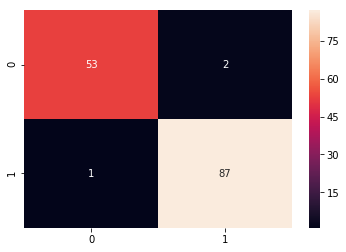

In [19]:
sns.heatmap(cm, annot= True)

In [20]:
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

        0.0       0.98      0.96      0.97        55
        1.0       0.98      0.99      0.98        88

avg / total       0.98      0.98      0.98       143



In [22]:
from sklearn.grid_search import GridSearchCV

log_reg = LogisticRegression()

#parameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
scores = ['accuracy', 'recall']
for sc in scores:
    grid_log_reg=GridSearchCV(log_reg,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid_log_reg.fit(X_train,y_train)
    print(grid_log_reg.best_params_)
    print(np.round(grid_log_reg.best_score_,3))

# Tuning hyper-parameters for accuracy
{'C': 1000}
0.958
# Tuning hyper-parameters for recall
{'C': 10}
0.974
